In [62]:
import pandas as pd

# sesuaikan dengan nama file hasil upload
file_path = "/barubanget_with_status.csv"

# coba baca dengan encoding latin1 (lebih aman kalau ada karakter khusus)
df = pd.read_csv(file_path, sep=';', engine="python", encoding="latin1")

df.head()

,Index,pH,Temperatur (°C),Kadar Air (%),Kelembapan (%),status
0,1,"6,19","28,6","26,2",65,ok
1,2,"6,54",39,"25,1","78,9",warning
2,3,"6,58","22,5","31,4","73,1",ok
3,4,"6,27","22,2","7,3","66,4",warning
4,5,"6,14","23,2","20,4","68,3",ok


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Pastikan kolom numerik jadi float
num_cols = ["pH", "Temperatur (°C)", "Kadar Air (%)", "Kelembapan (%)"]
for col in num_cols:
    # Replace comma with dot and convert to numeric
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Isi NaN dengan median, bukan drop semua
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Encode label 'status'
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])  # ok=1, warning=0 (misalnya)

# Cek distribusi label (penting biar tidak kosong)
print(df["status"].value_counts())

# Pisahkan fitur dan target
X = df[num_cols].values
y = df["status_encoded"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

status
ok         2930
warning    2070
Name: count, dtype: int64
Train shape: (4000, 4)
Test shape: (1000, 4)


In [64]:
# Pastikan kolom numerik terkonversi ke float
num_cols = ["pH", "Temperatur (°C)", "Kadar Air (%)", "Kelembapan (%)"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Pastikan tidak ada NaN
df = df.dropna()

# Encode label 'status' (ok / warning)
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])  # ok=1, warning=0 (biasanya)

# Pisahkan fitur (X) dan target (y)
X = df[num_cols].values
y = df["status_encoded"].values

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur (supaya ANN lebih stabil)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Definisi model ANN
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # binary classification
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Ringkasan model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7091 - loss: 0.5802 - val_accuracy: 0.8970 - val_loss: 0.3450
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9231 - loss: 0.2868 - val_accuracy: 0.9340 - val_loss: 0.2018
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9470 - loss: 0.1784 - val_accuracy: 0.9370 - val_loss: 0.1594
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9493 - loss: 0.1511 - val_accuracy: 0.9410 - val_loss: 0.1426
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9520 - loss: 0.1349 - val_accuracy: 0.9460 - val_loss: 0.1337
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9542 - loss: 0.1236 - val_accuracy: 0.9470 - val_loss: 0.1279
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9592 - loss: 0.1157 - val_accuracy: 0.9420 - val_loss: 0.1295
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9601 - loss: 0.1057 - val_accuracy: 0.

In [67]:
# Prediksi probabilitas pada data testing
y_pred_prob = model.predict(X_test)

# Ubah probabilitas prediksi menjadi kelas biner (0 atau 1) dengan threshold 0.5
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Cetak confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Cetak classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[572  14]
 [ 39 375]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       586
           1       0.96      0.91      0.93       414

    accuracy                           0.95      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.95      0.95      1000



In [77]:
import random
from sklearn.preprocessing import LabelEncoder

# Prediksi probabilitas pada data testing (sudah dilakukan pada subtask sebelumnya)
# y_pred_prob = model.predict(X_test_scaled)

# Konversi hasil prediksi probabilitas menjadi label kelas biner (0 atau 1) menggunakan ambang batas 0.5 (sudah dilakukan pada subtask sebelumnya)
# y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Konversi label kelas biner yang diprediksi kembali ke label asli ('ok' atau 'warning')
# Ensure le is defined, it is defined in cell H56VlHsYgxzL
y_pred_labels = le.inverse_transform(y_pred_binary.flatten())

# Konversi label asli data testing kembali ke label asli ('ok' atau 'warning')
y_test_labels = le.inverse_transform(y_test)


# Tampilkan beberapa contoh data testing beserta label asli dan label prediksi
print("\nPerbandingan Label Asli vs Prediksi:")
print("="*50)

# Ambil beberapa indeks acak dari data testing
sample_indices = random.sample(range(len(X_test)), min(len(X_test), 100)) # Limit to 10 samples

for i in sample_indices:
    print(f"Sample {i}:")
    # Since X_test is scaled numpy array, access elements by index
    print(f"  Features: {X_test[i]}")
    print(f"  Label Asli: {y_test_labels[i]}")
    print(f"  Label Prediksi: {y_pred_labels[i]}")
    print("-" * 20)


Perbandingan Label Asli vs Prediksi:
Sample 82:
  Features: [ 0.26538508  0.30926257 -0.53776707 -0.73875974]
  Label Asli: ok
  Label Prediksi: ok
--------------------
Sample 707:
  Features: [ 0.31843954 -0.13430905  0.00253265  2.31624407]
  Label Asli: warning
  Label Prediksi: warning
--------------------
Sample 371:
  Features: [-0.14578704  0.43346263 -0.12353728  0.65527113]
  Label Asli: ok
  Label Prediksi: ok
--------------------
Sample 829:
  Features: [-0.30495045 -0.29399484 -0.71786698 -0.47181766]
  Label Asli: ok
  Label Prediksi: ok
--------------------
Sample 190:
  Features: [-0.5834864   3.09489239 -0.69985699 -0.59045858]
  Label Asli: warning
  Label Prediksi: warning
--------------------
Sample 559:
  Features: [ 0.30517593 -0.18753765 -0.14154727 -0.21476232]
  Label Asli: ok
  Label Prediksi: ok
--------------------
Sample 722:
  Features: [ 0.05316721  0.80606279 -0.15055227  0.13127371]
  Label Asli: ok
  Label Prediksi: ok
--------------------
Sample 990:


In [78]:
import pandas as pd
from google.colab import files

# Buat DataFrame dari hasil prediksi
results_df = pd.DataFrame({
    "Features": [X_test[i] for i in sample_indices],
    "Label_Asli": [y_test_labels[i] for i in sample_indices],
    "Label_Prediksi": [y_pred_labels[i] for i in sample_indices]
})

# Simpan ke Excel
output_file = "hasil_prediksi.xlsx"
results_df.to_excel(output_file, index=False)

# Download otomatis ke PC/laptop
files.download(output_file)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# Buat DataFrame sementara untuk menampilkan hasil dengan lebih mudah
results_df = pd.DataFrame({
    'Actual_Label': y_test_labels,
    'Predicted_Label': y_pred_labels
})

print("\nIndeks Data Testing dengan Label Asli dan Prediksi:")
print("="*60)

# Tampilkan indeks untuk data 'ok' (baik asli maupun prediksi)
print("\nData dengan Status 'ok':")
print("--------------------")
ok_indices = results_df[(results_df['Actual_Label'] == 'ok') | (results_df['Predicted_Label'] == 'ok')].index.tolist()
print(f"Jumlah data 'ok' (Asli atau Prediksi): {len(ok_indices)}")
print("Contoh indeks:", ok_indices[:20]) # Tampilkan beberapa contoh indeks

# Tampilkan indeks untuk data 'warning' (baik asli maupun prediksi)
print("\nData dengan Status 'warning':")
print("--------------------")
warning_indices = results_df[(results_df['Actual_Label'] == 'warning') | (results_df['Predicted_Label'] == 'warning')].index.tolist()
print(f"Jumlah data 'warning' (Asli atau Prediksi): {len(warning_indices)}")
print("Contoh indeks:", warning_indices[:20]) # Tampilkan beberapa contoh indeks

# Untuk melihat detail perbandingan, bisa difilter lebih lanjut
print("\nPerbandingan Detail (Contoh 10 Data):")
print("------------------------------------")
print(results_df.head(10))


Indeks Data Testing dengan Label Asli dan Prediksi:

Data dengan Status 'ok':
--------------------
Jumlah data 'ok' (Asli atau Prediksi): 625
Contoh indeks: [0, 1, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25]

Data dengan Status 'warning':
--------------------
Jumlah data 'warning' (Asli atau Prediksi): 428
Contoh indeks: [2, 3, 4, 6, 11, 16, 18, 26, 30, 31, 33, 34, 35, 38, 42, 43, 46, 47, 49, 50]

Perbandingan Detail (Contoh 10 Data):
------------------------------------
  Actual_Label Predicted_Label
0           ok              ok
1           ok              ok
2      warning         warning
3      warning         warning
4      warning         warning
5           ok              ok
6      warning         warning
7           ok              ok
8           ok              ok
9           ok              ok


In [71]:
# Evaluasi di test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi Test: {acc*100:.2f}%")

# Prediksi
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi Test: 94.70%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

          ok       0.94      0.98      0.96       586
     warning       0.96      0.91      0.93       414

    accuracy                           0.95      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.95      0.95      1000


Confusion Matrix:
[[572  14]
 [ 39 375]]


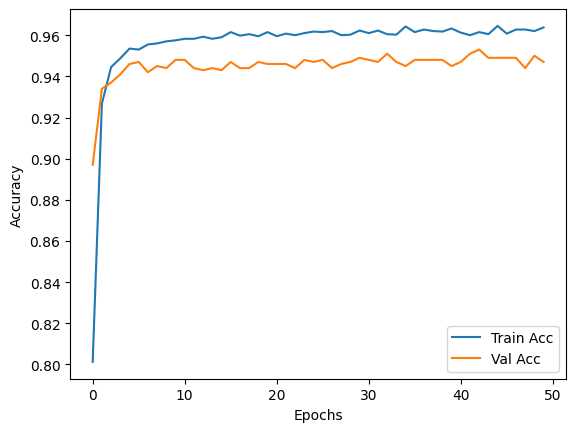

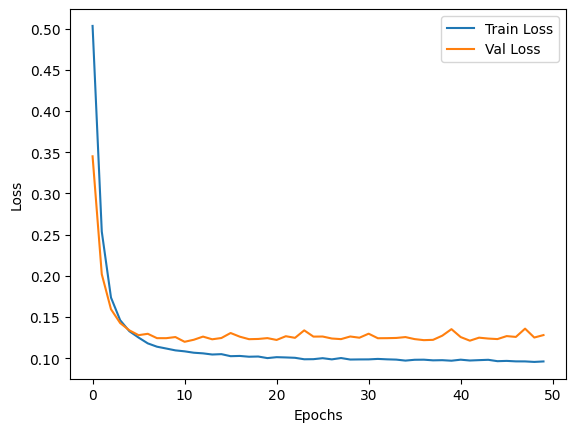

In [72]:
# Plot training & validation accuracy
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


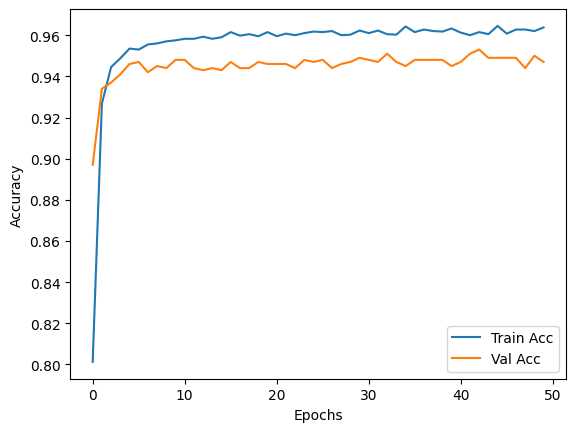

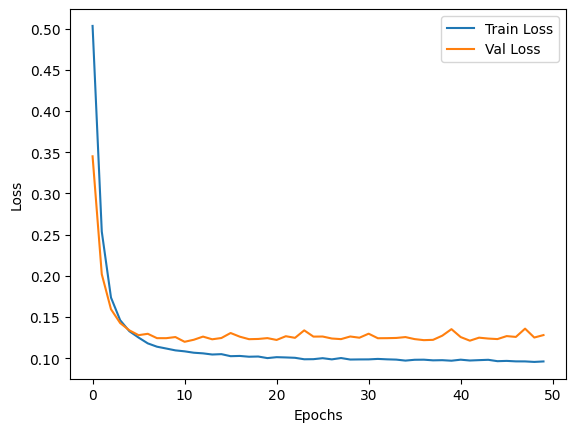

In [73]:
# Plot training & validation accuracy
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
